Restrictions via penalties
===============================

Parameter restrictions:  {'A': (None, 10), 'sig': (4.1, 7.1)}

Penalty factor:  1e+20


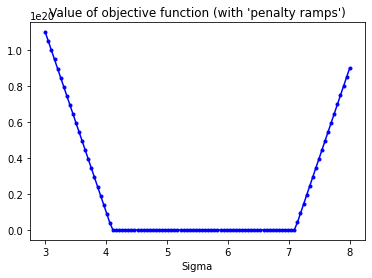

Optimization terminated successfully.
         Current function value: 371.740238
         Iterations: 427
         Function evaluations: 721

Fit result:  (array([ 0.75387138, 10.12916274,  7.09539653,  1.00255828]), 371.74023833526115, 427, 721, 0)

------------------- Parameter summary --------------------
      A =     0.753871, free: T, restricted: T, related: F
     mu =      10.1292, free: T, restricted: F, related: F
    sig =       7.0954, free: T, restricted: T, related: F
    off =      1.00256, free: T, restricted: F, related: F
    lin =            0, free: F, restricted: F, related: F
----------------------------------------------------------


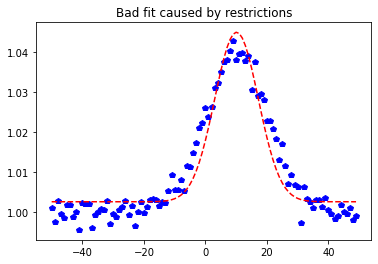

In [1]:
from __future__ import print_function, division
from numpy import arange, sqrt, exp, pi, random, ones_like
import numpy as np
import matplotlib.pylab as plt
from PyAstronomy import funcFit2 as fuf2
import scipy.optimize as sco

random.seed(1234)

# Creating a Gaussian with some noise
# Choose some parameters...
gPar = {"A":1.0, "sig":10.0, "mu":10.0, "off":1.0, "lin":0.0}
# Calculate profile
x = arange(100) - 50.0
y = gPar["off"] + gPar["A"] / sqrt(2*pi*gPar["sig"]**2) \
    * exp(-(x-gPar["mu"])**2/(2*gPar["sig"]**2))
# Add some noise...
y += random.normal(0.0, 0.002, x.size)
# ...and save the error bars
yerr = ones_like(x)*0.002

# Create a model object
gf = fuf2.GaussFit()

# Set guess values for the parameters
gf.assignValues({"A":3, "sig":3.77, "off":0.96, "mu":9.5})

# 'Thaw' those (the order is irrelevant)
gf.thaw(["mu", "sig", "off", "A"])

# Restrict parameter range of sigma to within 4.1 to 7.1
# where the upper limit is too small for input values
gf.setRestriction({"sig":[4.1,7.1]})
# An upper limit of 10 with no lower limit on the area of the Gaussian
gf.setRestriction({"A":[None,10]})

# Check restrictions 
print("Parameter restrictions: ", gf.getRestrictions())
print()
print("Penalty factor: ", gf.getPenaltyFactor())

# Inspect the effect of the restriction on the objective function value
sigs = np.linspace(3,8,100)
oval = np.zeros_like(sigs)

for i, sig in enumerate(sigs):
    gf["sig"] = sig
    oval[i] = gf.chisqr(gf.freeParamVals(),x,y,yerr)
    
plt.title("Value of objective function (with 'penalty ramps')")
plt.xlabel("Sigma")
plt.plot(sigs, oval, 'b.-')
plt.show()

# Use a minimization algorithm, which itself ignores
# restrictions, and observe effect of penalties
fr = fuf2.fitfmin(gf, gf.chisqr, x, y, yerr=yerr)
print()
print("Fit result: ", fr)
print()

gf.parameterSummary()
plt.title("Bad fit caused by restrictions")
plt.plot(x, y, 'bp')
plt.plot(x, gf.evaluate(x), 'r--')
plt.show()